In [1]:
import pandas as pd

df = pd.read_csv("../../../../data/preprocessed_data.csv")

Separate between objective and independent variables

In [2]:
x = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

Divide the data between train and test data

In [3]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2)

Implementing Random Forest, KNN and Logistic Regresion

In [4]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix


# Initialize the Random Forest model
modelRandomForest = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize the KNN model 
modelKNN = KNeighborsClassifier(n_neighbors=12)

# Initialize the Logistic Regression model
modelLogistic = LogisticRegression(max_iter=500, random_state=42)

# Initialize the AdaBoostClassifier with Logistic Regression as the base estimator
adaboost_model = AdaBoostClassifier(base_estimator=LogisticRegression(max_iter=500, random_state=42),
                                    n_estimators=50, random_state=42)

# Fit the models on the training data
modelRandomForest.fit(x_train, y_train)
modelKNN.fit(x_train, y_train)
modelLogistic.fit(x_train, y_train)
adaboost_model.fit(x_train, y_train)
adaboost_model.fit(x_train, y_train)

# Make predictions on the test data for each model
y_prob_random_forest = modelRandomForest.predict_proba(x_test)
y_prob_knn = modelKNN.predict_proba(x_test)
y_prob_logistic = modelLogistic.predict_proba(x_test)
y_prob_adaboost = adaboost_model.predict_proba(x_test)
y_prob_adaboost = adaboost_model.predict_proba(x_test)

c:\Users\pablo\OneDrive\Documentos\GitHub\Probabilistic-Heart-Disease-Prediction\venv\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\pablo\OneDrive\Documentos\GitHub\Probabilistic-Heart-Disease-Prediction\venv\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Fusion

Mean Fusion Classifier Metrics:
Accuracy: 0.7619377848226669
Recall: 0.8008926838734718
F1 Score: 0.7745144036783335


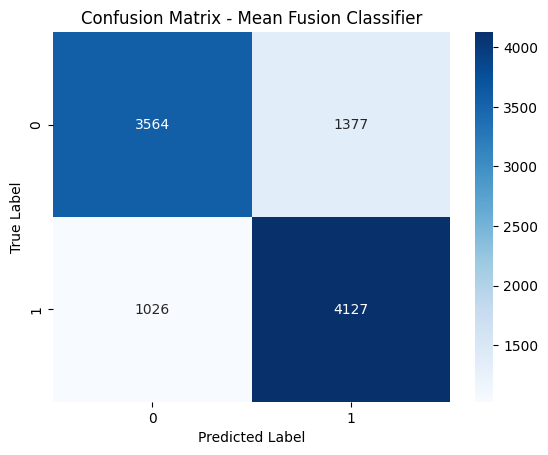

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Average the predicted probabilities
y_prob_mean = (y_prob_random_forest + y_prob_knn + y_prob_logistic + y_prob_adaboost) / 4

# Choose the class with the highest average probability as the final prediction
y_pred_mean = np.argmax(y_prob_mean, axis=1)

# Calculate evaluation metrics for the mean fusion
accuracy_mean = accuracy_score(y_test, y_pred_mean)
recall_mean = recall_score(y_test, y_pred_mean)
f1_mean = f1_score(y_test, y_pred_mean)
conf_matrix_mean = confusion_matrix(y_test, y_pred_mean)

# Print the metrics for the mean fusion
print("Mean Fusion Classifier Metrics:")
print("Accuracy:", accuracy_mean)
print("Recall:", recall_mean)
print("F1 Score:", f1_mean)

# Plot the confusion matrix for the mean fusion
sns.heatmap(conf_matrix_mean, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Mean Fusion Classifier")
plt.show()